In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import r2_score
from keras import callbacks
import pickle

In [2]:
data = pd.read_csv("HistoricalQuotes.csv", parse_dates = True)

In [3]:
data.rename(columns = {' Close/Last' : 'Close', ' Volume' : 'Volume', ' Open' : 'Open', ' High' : 'High', ' Low' : 'Low'}, inplace = True)

In [4]:
data = data.loc[::-1].reset_index(drop = True)

In [5]:
data.head(5)

,Date,Close,Volume,Open,High,Low
0,03/01/2010,$29.8557,137312041,$29.3928,$29.9286,$29.35
1,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771
2,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
3,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
4,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614


In [6]:
def convert(x):
  y = x[2:]
  return float(y)

In [7]:
data['Close'] = data['Close'].apply(convert)
data['Open'] = data['Open'].apply(convert)
data['High'] = data['High'].apply(convert)
data['Low'] = data['Low'].apply(convert)

In [8]:
data.head(5)

,Date,Close,Volume,Open,High,Low
0,03/01/2010,29.8557,137312041,29.3928,29.9286,29.3500
1,03/02/2010,29.8357,141486282,29.9900,30.1186,29.6771
2,03/03/2010,29.9043,92846488,29.8486,29.9814,29.7057
3,03/04/2010,30.1014,89591907,29.8971,30.1314,29.8043
4,03/05/2010,31.2786,224647427,30.7057,31.3857,30.6614


array([[<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

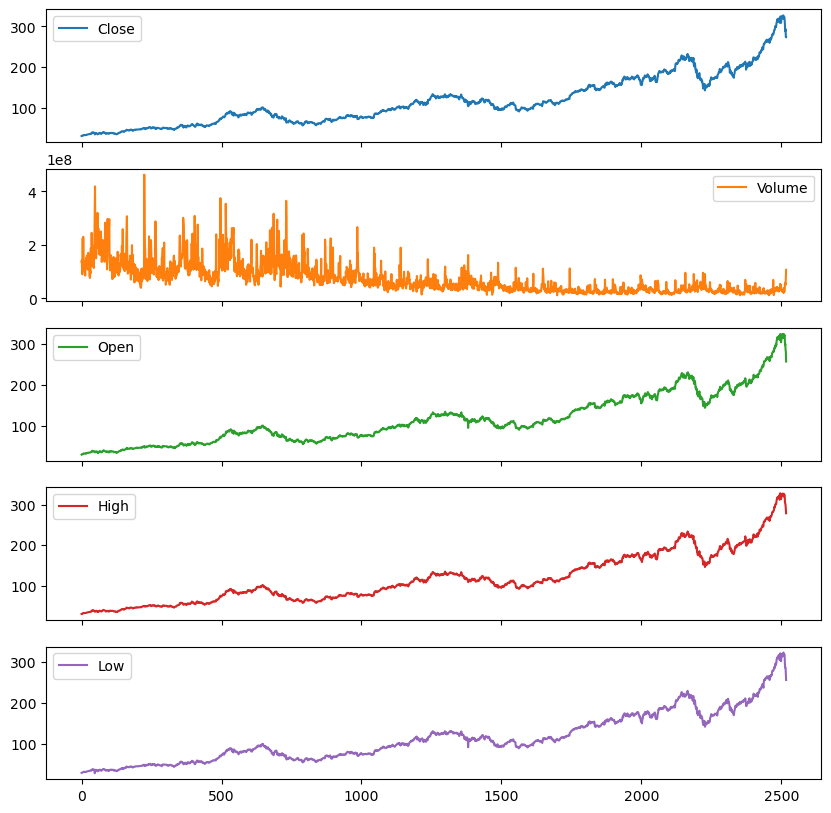

In [9]:
data.plot(subplots = True, layout = (5,1), figsize = (10, 10))

In [10]:
len = data.shape[0]
end = int(0.8 * len)
len

2518

In [11]:
newdata = data.iloc[:, 1]

In [12]:
X_train, y_train, X_test, y_test = [], [], [] , []

In [13]:
T = 10

In [14]:
for i in range(end):
  X_train.append(newdata[i:i+T])
  y_train.append(newdata[i+T])
X_train, y_train = np.array(X_train).reshape(end, T, 1), np.array(y_train).reshape(-1, 1)

In [15]:
for i in range(end - T, len - T):
  X_test.append(newdata[i:i+T])
  y_test.append(newdata[i+T])
X_test, y_test = np.array(X_test).reshape(len-end, T, 1), np.array(y_test).reshape(-1, 1)

In [16]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2014, 10, 1) (2014, 1) (504, 10, 1) (504, 1)


In [17]:
N = X_train.shape[2]
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, activation = 'relu', input_shape = (T,N)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(64, activation = 'linear'))
model.add(Dense(32, activation = 'linear'))
model.add(Dense(1, activation = 'relu'))

In [18]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

In [19]:
callback = callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights = True)

In [20]:
model.fit(X_train, y_train, epochs = 50, batch_size = 32, callbacks = [callback])

Epoch 1/50
63/63 [==============================] - 9s 16ms/step - loss: 105.5989 - accuracy: 0.0000e+00
Epoch 2/50
63/63 [==============================] - 1s 16ms/step - loss: 7.2360 - accuracy: 0.0000e+00
Epoch 3/50
63/63 [==============================] - 1s 16ms/step - loss: 6.7480 - accuracy: 0.0000e+00
Epoch 4/50
63/63 [==============================] - 1s 16ms/step - loss: 4.3192 - accuracy: 0.0000e+00
Epoch 5/50
63/63 [==============================] - 1s 15ms/step - loss: 4.8084 - accuracy: 0.0000e+00
Epoch 6/50
63/63 [==============================] - 1s 16ms/step - loss: 4.8912 - accuracy: 0.0000e+00
Epoch 7/50
63/63 [==============================] - 1s 16ms/step - loss: 3.5949 - accuracy: 0.0000e+00
Epoch 8/50
63/63 [==============================] - 1s 15ms/step - loss: 3.4481 - accuracy: 0.0000e+00
Epoch 9/50
63/63 [==============================] - 1s 16ms/step - loss: 2.9163 - accuracy: 0.0000e+00
Epoch 10/50
63/63 [==============================] - 1s 16ms/step - los

In [21]:
predict_x=model.predict(X_test) 
for i in range(predict_x.shape[0]):
    print(predict_x[i], y_test[i])

16/16 [==============================] - 1s 7ms/step
[181.41545] [178.12]
[181.69705] [175.]
[177.16522] [176.21]
[178.64232] [176.82]
[177.10187] [176.67]
[176.86522] [175.03]
[175.70802] [176.94]
[177.49248] [179.98]
[179.86719] [181.72]
[183.56445] [179.97]
[182.43031] [178.44]
[181.12325] [178.65]
[180.19046] [178.02]
[178.40837] [175.3]
[176.1989] [175.24]
[176.24983] [171.27]
[172.1416] [168.85]
[170.31825] [164.94]
[166.61848] [172.77]
[170.041] [168.34]
[167.08487] [166.48]
[167.46082] [167.78]
[168.97299] [166.68]
[166.76071] [168.39]
[168.54024] [171.61]
[171.66972] [172.8]
[174.11252] [168.38]
[169.78128] [170.05]
[172.65309] [173.25]
[174.79524] [172.44]
[173.21974] [174.14]
[177.48445] [174.73]
[177.22643] [175.82]
[178.781] [178.24]
[181.99025] [177.84]
[180.9891] [172.8]
[174.7519] [165.72]
[169.23483] [165.24]
[167.21037] [162.94]
[163.7576] [163.65]
[162.11047] [164.22]
[163.72614] [162.32]
[162.46045] [165.26]
[165.09187] [169.1]
[168.21178] [176.57]
[179.69215] [176.

[269.47235] [270.77]
[271.2376] [271.46]
[273.1239] [275.15]
[276.77295] [279.86]
[280.49948] [280.41]
[277.66742] [279.74]
[275.95306] [280.02]
[279.22897] [279.44]
[280.28662] [284.]
[286.6557] [284.27]
[284.08185] [289.91]
[289.26044] [289.8]
[287.64496] [291.52]
[287.65036] [293.65]
[291.11304] [300.35]
[297.40707] [297.43]
[291.99817] [299.8]
[292.7599] [298.39]
[296.11844] [303.19]
[302.1629] [309.63]
[308.86224] [310.33]
[303.37677] [316.96]
[302.28766] [312.68]
[304.11572] [311.34]
[304.7128] [315.24]
[313.6311] [318.73]
[316.35956] [316.57]
[312.49127] [317.7]
[314.72424] [319.23]
[316.37195] [318.31]
[316.53534] [308.95]
[310.7254] [317.69]
[318.57745] [324.34]
[316.09314] [323.87]
[320.04874] [309.51]
[313.41644] [308.66]
[313.77222] [318.85]
[313.18134] [321.45]
[314.41205] [325.21]
[318.74704] [320.03]
[316.132] [321.55]
[319.21695] [319.61]
[316.90244] [327.2]
[326.95404] [324.87]
[319.78622] [324.95]
[321.7913] [319.]
[318.3462] [323.62]
[323.7147] [320.3]
[314.45352] [3

In [22]:
from sklearn.metrics import r2_score

In [23]:
r2_score(predict_x, y_test)

0.9841760688847623

In [24]:
test = pd.DataFrame(y_test)
test['pred'] = predict_x

In [25]:
test.rename(columns = {0 : 'actual', 'pred' : 'predicted'}, inplace = True)
test

,actual,predicted
0,178.12,181.415451
1,175.00,181.697052
2,176.21,177.165222
3,176.82,178.642319
4,176.67,177.101868
...,...,...
499,298.18,314.525146
500,288.08,296.803802
501,292.65,261.301941
502,273.52,265.014862


<AxesSubplot:>

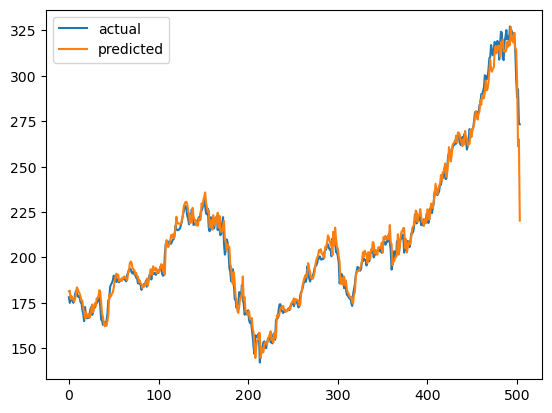

In [26]:
test.plot()

In [27]:
filename = 'model_pickle_apple_lstm.sav'
pickle.dump(model, open(filename, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-05-2

In [28]:
new = X_test[-1]
final = y_test[-1]
np.append(new, final)
new

array([[324.87],
       [324.95],
       [319.  ],
       [323.62],
       [320.3 ],
       [313.05],
       [298.18],
       [288.08],
       [292.65],
       [273.52]])

In [29]:
predictions = []
for i in range(10):
    fin = new.reshape(1, 10, 1)
    final = model.predict(fin)
    for j in final:
        new = np.append(new, j)
        predictions.append(j)
    new = new[1:]

1/1 [==============================] - 0s 59ms/step


In [30]:
predictions

[array([220.29509], dtype=float32),
 array([181.79022], dtype=float32),
 array([203.5712], dtype=float32),
 array([200.34985], dtype=float32),
 array([177.50584], dtype=float32),
 array([187.29709], dtype=float32),
 array([148.41728], dtype=float32),
 array([141.81859], dtype=float32),
 array([153.2616], dtype=float32),
 array([144.43094], dtype=float32)]

In [33]:
x = [i+data['Close'].shape[0] for i in range(10)]

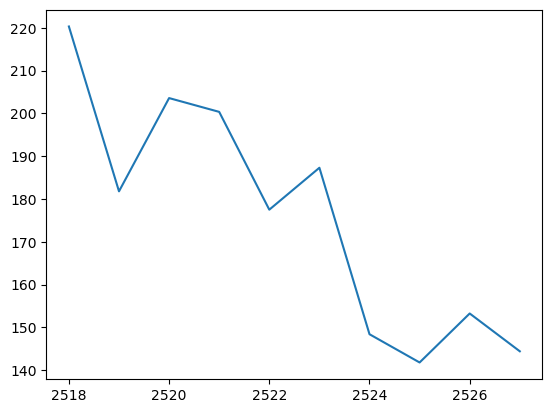

In [34]:
plt.plot(x,predictions)